In [1]:
%cd ../
%matplotlib inline

/home/ubuntu/HTFATorch


/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/__init__.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/a

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
new_pieman = niidb.FMriActivationsDb('data/new_pieman.db',
                                     mask='/data/eli/new_pieman/all_tasks/wholebrain.nii.gz')

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(list(new_pieman.all()), mask='/data/eli/new_pieman/all_tasks/wholebrain.nii.gz', num_factors=100)

01/11/2019 20:37:55 Loading Nifti image /data/eli/new_pieman/all_tasks/sub-47-task-word.nii with mask /data/eli/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
01/11/2019 20:38:00 Loading Nifti image /data/eli/new_pieman/all_tasks/sub-6-task-intact1.nii with mask /data/eli/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
01/11/2019 20:38:05 Loading Nifti image /data/eli/new_pieman/all_tasks/sub-30-task-word.nii with mask /data/eli/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
01/11/2019 20:38:11 Loading Nifti image /data/eli/new_pieman/all_tasks/sub-39-task-word.nii with mask /data/eli/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
01/11/2019 20:38:16 Loading Nifti image /data/eli/new_pieman/all_tasks/sub-50-task-word.nii with mask /data/eli/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
01/11/2019 20:38:21 Loading Nifti image /data/eli/new_pieman/all_tasks/sub-66-task-paragraph.nii with mask /

In [6]:
losses = htfa.train(num_steps=1000, learning_rate=1e-1, log_level=logging.INFO, num_particles=1,
                    batch_size=150, use_cuda=True, checkpoint_steps=50, blocks_batch_size=16)

01/11/2019 20:48:05 [Epoch 1] (94269ms) Posterior free-energy 5.54162432e+09
01/11/2019 20:48:05 Saving checkpoint...
01/11/2019 20:49:24 [Epoch 2] (78821ms) Posterior free-energy 4.65154611e+09
01/11/2019 20:50:42 [Epoch 3] (78121ms) Posterior free-energy 4.34243584e+09
01/11/2019 20:52:00 [Epoch 4] (78357ms) Posterior free-energy 4.25349786e+09
01/11/2019 20:53:19 [Epoch 5] (79181ms) Posterior free-energy 4.20721357e+09
01/11/2019 20:54:38 [Epoch 6] (78481ms) Posterior free-energy 4.20912128e+09
01/11/2019 20:55:57 [Epoch 7] (78884ms) Posterior free-energy 4.19629466e+09
01/11/2019 20:57:17 [Epoch 8] (80313ms) Posterior free-energy 4.19504896e+09
01/11/2019 20:58:36 [Epoch 9] (78587ms) Posterior free-energy 4.14144000e+09
01/11/2019 20:59:54 [Epoch 10] (78840ms) Posterior free-energy 4.10814541e+09
01/11/2019 21:01:14 [Epoch 11] (79672ms) Posterior free-energy 4.05352192e+09
01/11/2019 21:02:33 [Epoch 12] (79359ms) Posterior free-energy 4.00457011e+09
01/11/2019 21:03:52 [Epoch 13] (

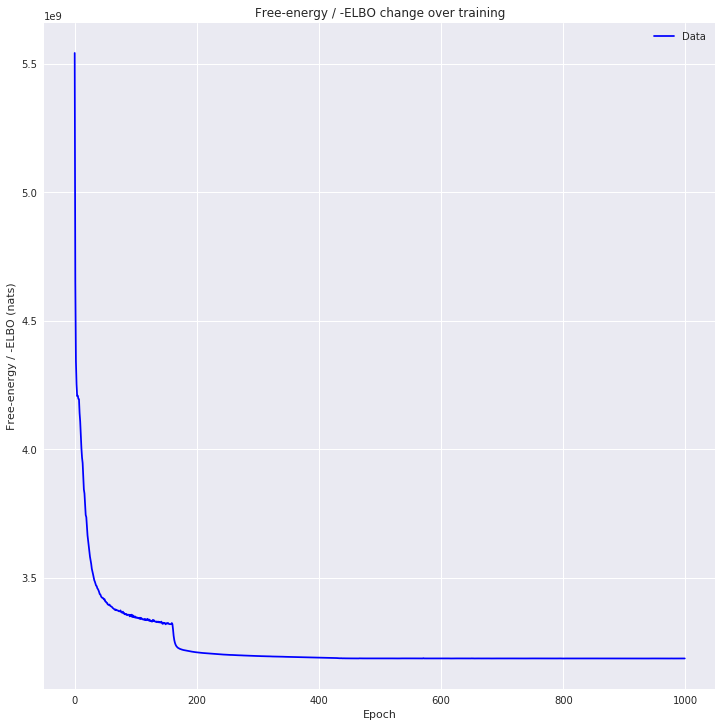

In [7]:
utils.plot_losses(losses)

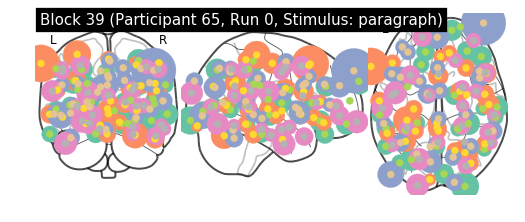

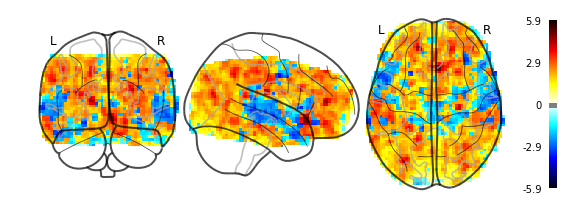

01/12/2019 18:37:13 Reconstruction Error (Frobenius Norm): 3.38786157e+03 out of 4.29069336e+03


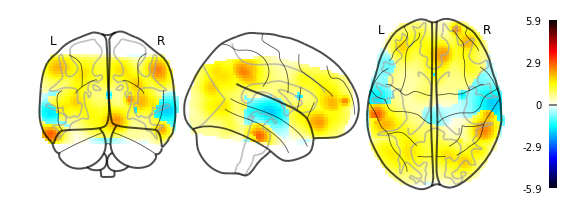

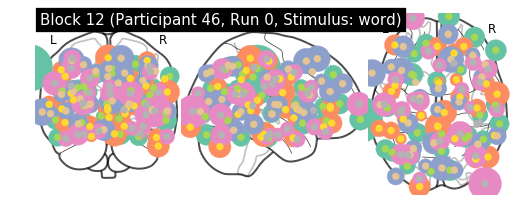

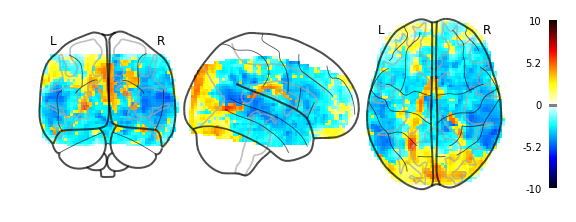

01/12/2019 18:37:52 Reconstruction Error (Frobenius Norm): 3.20623755e+03 out of 4.29069385e+03


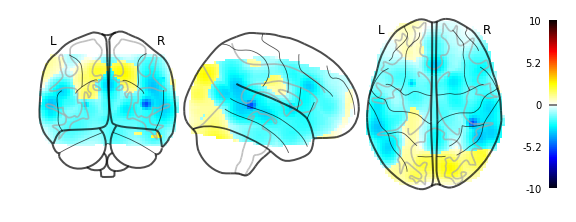

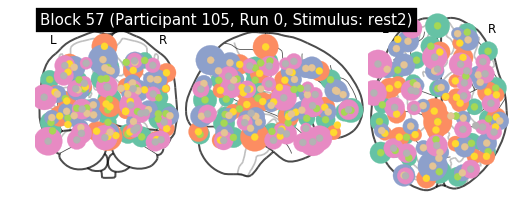

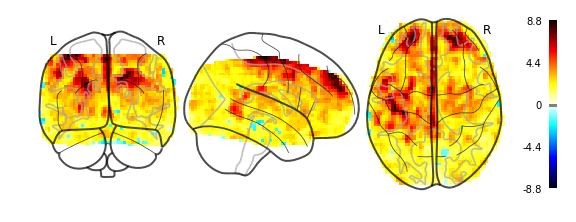

01/12/2019 18:38:39 Reconstruction Error (Frobenius Norm): 3.68461450e+03 out of 4.95446289e+03


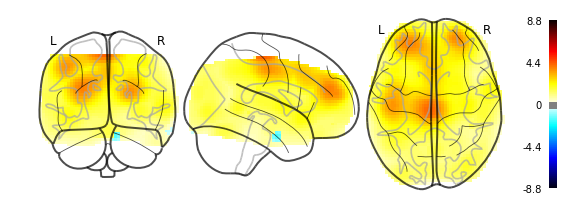

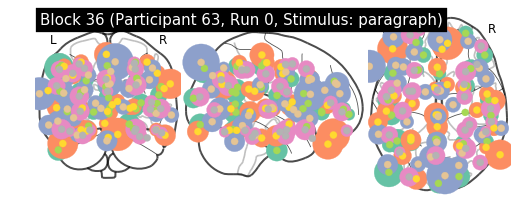

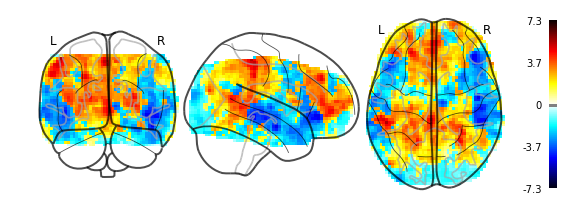

01/12/2019 18:39:16 Reconstruction Error (Frobenius Norm): 3.28590601e+03 out of 4.29069238e+03


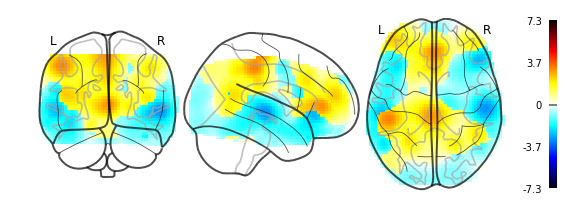

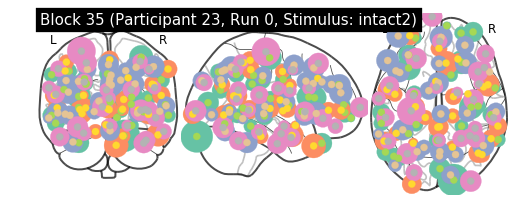

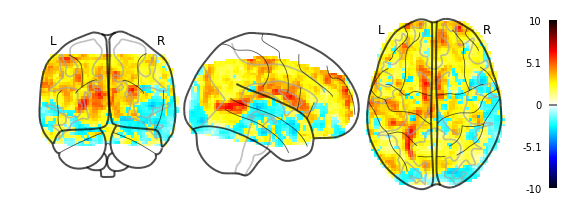

01/12/2019 18:39:53 Reconstruction Error (Frobenius Norm): 3.40145435e+03 out of 4.29069531e+03


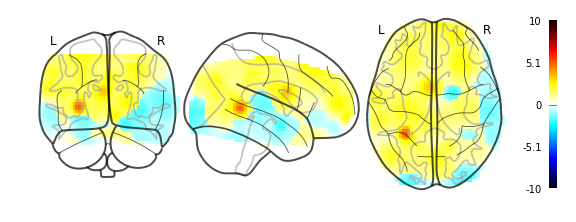

In [8]:
for b in np.random.choice(range(htfa.num_blocks), 5):
    htfa.plot_factor_centers(b)
    htfa.plot_original_brain(b)
    htfa.plot_reconstruction(b)

In [9]:
def task_labeler(b):
    return b.task

def rest_task_labeler(b):
    if b.task == 'rest':
        return 'Rest'
    else:
        return 'Task'

def subject_labeler(b):
    return str(b.subject)

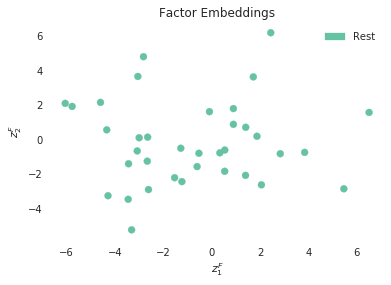

In [10]:
#factor 'embeddings' with PCA
htfa.scatter_factor_embedding(labeler=task_labeler, embedding='PCA')

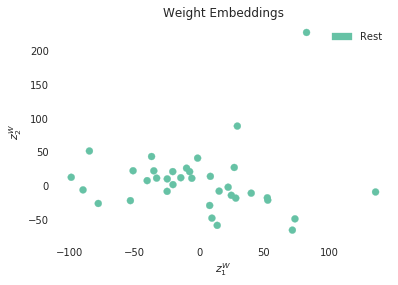

In [11]:
#weight 'embeddings' with PCA
htfa.scatter_weight_embedding(labeler=subject_labeler, embedding='PCA')

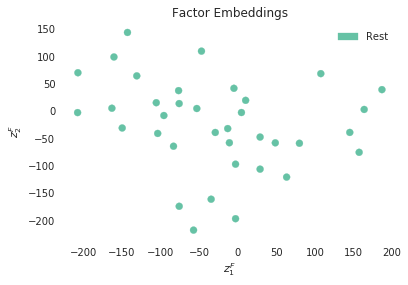

In [12]:
#factor 'embeddings' with TSNE
htfa.scatter_factor_embedding(labeler=task_labeler, embedding='TSNE')

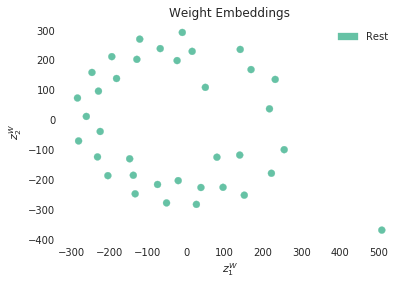

In [13]:
#weight 'embeddings' with TSNE
htfa.scatter_weight_embedding(labeler=subject_labeler, embedding='TSNE')

In [14]:
htfa.average_reconstruction_error()

--- Logging error ---
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/logging/__init__.py", line 992, in emit
    msg = self.format(record)
  File "/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/logging/__init__.py", line 838, in format
    return fmt.format(record)
  File "/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/logging/__init__.py", line 575, in format
    record.message = record.getMessage()
  File "/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: only size-1 arrays can be converted to Python scalars
Call stack:
  File "/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/ipyk

(array([8.25402409, 8.25402409, 8.25402409, ..., 8.25402409, 8.25402409,
        8.25402409]),
 array([11.22497244, 11.22497244, 11.22497244, ..., 11.22497244,
        11.22497244, 11.22497244]),
 array([0.03471085, 0.03471085, 0.03471085, ..., 0.03471085, 0.03471085,
        0.03471085]))